In [1]:
# MNIST Data set

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
d0= pd.read_csv('mnist_train.csv')

In [4]:
d0.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
l = d0['label']

In [6]:
d = d0.drop('label',axis=1)

In [7]:
d.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


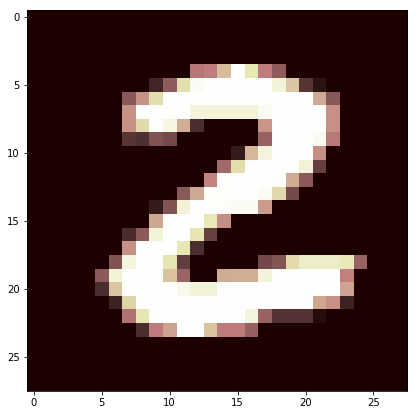

here actual label value is: 2


In [8]:
plt.figure(figsize=(7,7))
idx = 25

grid_mat =d.iloc[idx].as_matrix().reshape(28,28)

plt.imshow(grid_mat,interpolation='none',cmap='pink')
plt.show()

print('here actual label value is:',l[idx])

In [9]:
print(l.shape)
print(d.shape)

(60000,)
(60000, 784)


In [10]:
label = l.head(15000)

In [11]:
data = d.head(15000)
print(data.shape)

(15000, 784)


In [12]:
# now we need to Standardize the data point...
# We need to do some preprocessing data ... standardize the data

from sklearn.preprocessing import StandardScaler

Stnd_data = StandardScaler().fit_transform(data)
print('Standardized Data shape:',Stnd_data.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


Standardized Data shape: (15000, 784)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
# find the Coverrinace of Matrix  
# A.t * A ( A transpose * A)

sample_data = Stnd_data
sample_data.shape

covr_matrix = np.matmul(sample_data.T,sample_data)
covr_matrix.shape

(784, 784)

In [14]:
# Finding the Eigen values with corresponding Eigen Vectors
# here we are doing 784 dim  towards 2-dim...
# there is  a eigh function from Linear Algebra..(linalg) to get the Eigen Values and Eigen Vectors...

from scipy.linalg import eigh

e_values , e_vectors = eigh(covr_matrix,eigvals=(782,783))
print(e_vectors.shape)

(784, 2)


In [15]:
e_vectors = e_vectors.T

In [16]:
e_vectors.shape

(2, 784)

In [21]:
import matplotlib.pyplot as plt

new_cordinated = np.matmul(e_vectors,sample_data.T)

print('The shape of New_ Cordinates matrix is :',e_vectors.shape,'X',sample_data.T.shape,'=',new_cordinated.shape)

The shape of New_ Cordinates matrix is : (2, 784) X (784, 15000) = (2, 15000)


In [22]:
new_cordinated = np.vstack((new_cordinated,label)).T
#df = pd.DataFrame(data=new_cordinated,columns=("1st-P","2nd-P"))
#df.head()

In [23]:
new_cordinated.shape

(15000, 3)

In [25]:
#new_cordinated = np.vstack((new_cordinated,label)).T
df = pd.DataFrame(data=new_cordinated,columns=("1st-P","2nd-P","Label"))
df.head()

,1st-P,2nd-P,Label
0,-4.457050,0.960769,5.0
1,-7.397795,-8.658155,0.0
2,9.640690,-2.082854,4.0
3,-3.356074,7.187465,1.0
4,2.979880,4.933889,9.0


In [27]:
import seaborn as sns

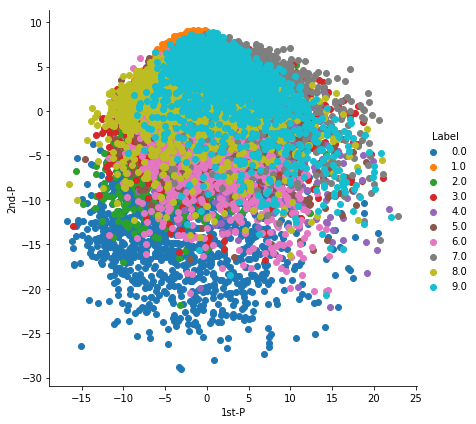

In [40]:
sns.FacetGrid(df,hue="Label",height=6).map(plt.scatter,"1st-P","2nd-P").add_legend()
plt.show()